# Neural Networks

Predict whether the cancer is benign or malignant

In [1839]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

Set the csv file name 

In [1840]:
train_filename = "./dataset/data.csv"

Set column keys

In [1841]:
idKey = "id"
diagnosisKey = "diagnosis"
radiusMeanKey = "radius_mean"
textureMeanKey = "texture_mean"
perimeterMeanKey = "perimeter_mean"
areaMeanKey = "area_mean"
smoothnessMeanKey = "smoothness_mean"
compactnessMeanKey = "compactness_mean"
concavityMeanKey = "concavity_mean"
concavePointsMeanKey = "concave points_mean"
symmetryMeanKey = "symmetry_mean"
fractalDimensionMean = "fractal_dimension_mean"
radiusSeKey = "radius_se"
textureSeKey = "texture_se"
perimeterSeKey = "perimeter_se"
areaSeKey = "area_se"
smoothnessSeKey = "smoothness_se"
compactnessSeKey = "compactness_se"
concavitySeKey = "concavity_se"
concavePointsSeKey = "concave points_se"
symmetrySeKey = "symmetry_se"
fractalDimensionSeKey = "fractal_dimension_se"
radiusWorstKey = "radius_worst"
textureWorstKey = "texture_worst"
perimeterWorstKey = "perimeter_worst"
areaWorstKey = "area_worst"
smoothnessWorstKey = "smoothness_worst"
compactnessWorstKey = "compactness_worst"
concavityWorstKey = "concavity_worst"
concavePointsWorstKey = "concave points_worst"
symmetryWorstKey = "symmetry_worst"
fractalDimensionWorstKey = "fractal_dimension_worst"

In [1842]:
train_columns = [idKey, diagnosisKey, radiusMeanKey, textureMeanKey, perimeterMeanKey, areaMeanKey, smoothnessMeanKey, compactnessMeanKey, concavityMeanKey, concavePointsMeanKey, symmetryMeanKey, fractalDimensionMean, radiusSeKey, textureSeKey, perimeterSeKey, areaSeKey, smoothnessSeKey, compactnessSeKey, concavitySeKey, concavePointsSeKey, symmetrySeKey, fractalDimensionSeKey, radiusWorstKey, textureWorstKey, perimeterWorstKey, areaWorstKey, smoothnessWorstKey, compactnessWorstKey, concavityWorstKey, concavePointsWorstKey, symmetryWorstKey, fractalDimensionWorstKey]

In [1843]:
def get_train_data():
    df = pd.read_csv(train_filename, names= train_columns, delimiter=',', skiprows=1)
    return df

In [1844]:
train_data = get_train_data()

### Exploring the data

In [1845]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1846]:
train_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1847]:
train_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing values, that makes things a little easier.
Let's see how area_mean compares across malignant and benign diagnosis.

In [1848]:
print ("Malignant")
print (train_data.area_mean[train_data.diagnosis == "M"].describe())
print ()
print ("Benign")
print (train_data.area_mean[train_data.diagnosis == "B"].describe())

Malignant
count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64
()
Benign
count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64


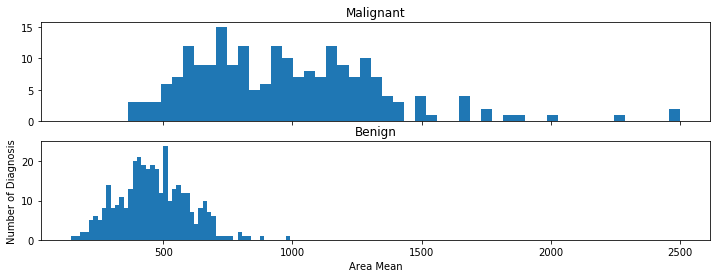

In [1849]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(train_data.area_mean[train_data.diagnosis == "M"], bins = bins)
ax1.set_title('Malignant')

ax2.hist(train_data.area_mean[train_data.diagnosis == "B"], bins = bins)
ax2.set_title('Benign')

plt.xlabel('Area Mean')
plt.ylabel('Number of Diagnosis')
plt.show()

The 'area_mean' feature looks different as it increases its value across both types of diagnosis. You could argue that malignant diagnosis are more are more uniformly distributed, while benign diagnosis have a normal distribution. This could make it easier to detect a malignant diagnosis when the area_mean is above the 750 value.
Now let's see how the diagnosis area_worst differs between the two types.

In [1850]:
print ("Malignant")
print (train_data.area_worst[train_data.diagnosis == "M"].describe())
print ()
print ("Benign")
print (train_data.area_worst[train_data.diagnosis == "B"].describe())

Malignant
count     212.000000
mean     1422.286321
std       597.967743
min       508.100000
25%       970.300000
50%      1303.000000
75%      1712.750000
max      4254.000000
Name: area_worst, dtype: float64
()
Normal
count     357.000000
mean      558.899440
std       163.601424
min       185.200000
25%       447.100000
50%       547.400000
75%       670.000000
max      1210.000000
Name: area_worst, dtype: float64


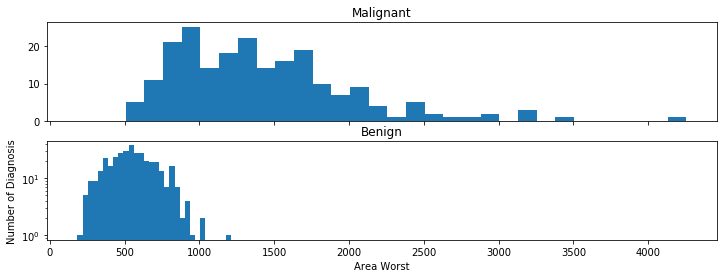

In [1851]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(train_data.area_worst[train_data.diagnosis == "M"], bins = bins)
ax1.set_title('Malignant')

ax2.hist(train_data.area_worst[train_data.diagnosis == "B"], bins = bins)
ax2.set_title('Benign')

plt.xlabel('Area Worst')
plt.ylabel('Number of Diagnosis')
plt.yscale('log')
plt.show()

It looks pretty much the same as the last graph.
Next, let's take a look at the rest of the features features.

In [1852]:
#Select only the rest of the features.
r_data = train_data.drop([idKey, areaMeanKey, areaWorstKey, diagnosisKey], axis=1)
r_features = r_data.columns

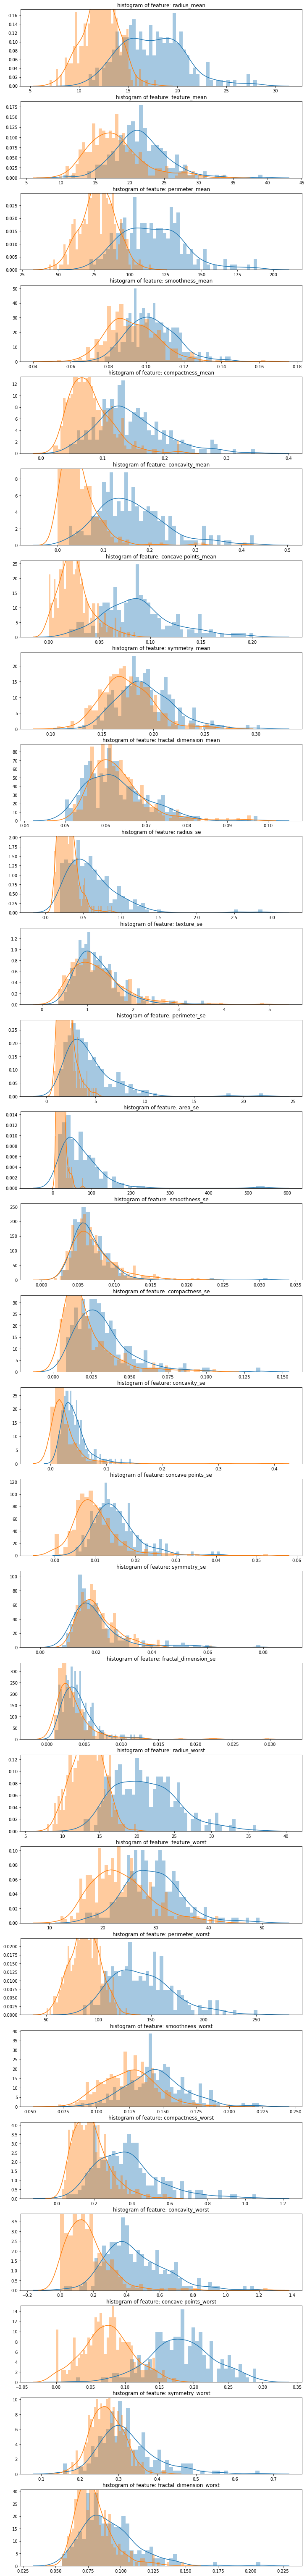

In [1853]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(r_data[r_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_data[cn][train_data.diagnosis == "M"], bins=50)
    sns.distplot(train_data[cn][train_data.diagnosis == "B"], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Update the value of diagnosis. 1 for Malignant and 0 for Benign

In [1854]:
train_data.loc[train_data.diagnosis == "M", 'diagnosis'] = 1
train_data.loc[train_data.diagnosis == "B", 'diagnosis'] = 0

Create a new feature for benign (non-malignant) diagnosis.

In [1855]:
train_data.loc[train_data.diagnosis == 0, 'benign'] = 1
train_data.loc[train_data.diagnosis == 1, 'benign'] = 0

Convert benign column type to integer

In [1856]:
train_data['benign'] = train_data.benign.astype(int)

Rename 'Class' to 'Malignant'.

In [1857]:
train_data = train_data.rename(columns={'diagnosis': 'malignant'})

212 malignant diagnosis, 357 benign diagnosis.
37.25% of diagnostics were malignant. 

In [1858]:
print(train_data.benign.value_counts())
print()
print(train_data.malignant.value_counts())

1    357
0    212
Name: benign, dtype: int64
()
0    357
1    212
Name: malignant, dtype: int64


In [1859]:
pd.set_option("display.max_columns",101)
train_data.head()

,id,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Create dataframes of only Malignant and Benign diagnosis.

In [1860]:
Malignant = train_data[train_data.malignant == 1]
Benign = train_data[train_data.benign == 1]

Set train_X equal to 80% of the malignant diagnosis.

In [1861]:
train_X = Malignant.sample(frac=0.8)
count_Malignants = len(train_X)

Add 80% of the benign diagnosis to train_X.

In [1862]:
train_X = pd.concat([train_X, Benign.sample(frac = 0.8)], axis = 0)

test_X contains all the diagnostics not in train_X.

In [1863]:
test_X = train_data.loc[~train_data.index.isin(train_X.index)]

Shuffle the dataframes so that the training is done in a random order.

In [1864]:
train_X = shuffle(train_X)
test_X = shuffle(test_X)

Add our target features to train_Y and test_Y

In [1865]:
train_Y = train_X.malignant
train_Y = pd.concat([train_Y, train_X.benign], axis=1)

In [1866]:
test_Y = test_X.malignant
test_Y = pd.concat([test_Y, test_X.benign], axis=1)

Drop target features from train_X and test_X

In [1867]:
train_X = train_X.drop(['malignant','benign'], axis = 1)
test_X = test_X.drop(['malignant','benign'], axis = 1)

Check to ensure all of the training/testing dataframes are of the correct length

In [1868]:
print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

456
456
113
113


Names of all of the features in train_X.

In [1869]:
features = train_X.columns.values

Transform each feature in features so that it has a mean of 0 and standard deviation of 1; 
This helps with training the softmax algorithm.

In [1870]:
for feature in features:
    mean, std = train_data[feature].mean(), train_data[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

## Train the Neural Network

Parameters

In [1871]:
learning_rate = 0.005
training_dropout = 0.9
display_step = 1
training_epochs = 5
batch_size = 100
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = [] 

Number of input nodes

In [1872]:
input_nodes = train_X.shape[1]

Number of labels (malignant and benign)

In [1873]:
num_labels = 2

Split the testing data into validation and testing sets

In [1874]:
split = int(len(test_Y)/2)

train_size = train_X.shape[0]
n_samples = train_Y.shape[0]

input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()
input_X_valid = test_X.as_matrix()[:split]
input_Y_valid = test_Y.as_matrix()[:split]
input_X_test = test_X.as_matrix()[split:]
input_Y_test = test_Y.as_matrix()[split:]

In [1875]:
def calculate_hidden_nodes(nodes):
    return (((2 * nodes)/3) + num_labels)

Number of nodes in each hidden layer

In [1876]:
hidden_nodes1 = calculate_hidden_nodes(input_nodes)
hidden_nodes2 = calculate_hidden_nodes(hidden_nodes1)
hidden_nodes3 = calculate_hidden_nodes(hidden_nodes2)
print(input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3)

(31, 22, 16, 12)


Percent of nodes to keep during dropout.

In [1877]:
pkeep = tf.placeholder(tf.float32)

Input

In [1878]:
x = tf.placeholder(tf.float32, [None, input_nodes])

Layer 1

In [1879]:
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

Layer 2

In [1880]:
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)

Layer 3

In [1881]:
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.relu(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

Layer 4

In [1882]:
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

Output

In [1883]:
y = y4
y_ = tf.placeholder(tf.float32, [None, num_labels]) 

Minimize error using cross entropy

In [1884]:
cost = -tf.reduce_sum(y_ * tf.log(y))

AdamOptimizer

In [1885]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Test Model

In [1886]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

Calculate accuracy

In [1887]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Initializing the variables

In [1888]:
init = tf.global_variables_initializer()

Launch the graph

('Epoch:', 0, 'Acc =', '0.86184', 'Cost =', '292.25006', 'Valid_Acc =', '0.83929', 'Valid_Cost = ', '35.84199')
('Epoch:', 1, 'Acc =', '0.91667', 'Cost =', '249.48508', 'Valid_Acc =', '0.92857', 'Valid_Cost = ', '30.25830')
('Epoch:', 2, 'Acc =', '0.92325', 'Cost =', '186.42664', 'Valid_Acc =', '0.94643', 'Valid_Cost = ', '21.94007')
('Epoch:', 3, 'Acc =', '0.93640', 'Cost =', '118.16685', 'Valid_Acc =', '0.94643', 'Valid_Cost = ', '13.27280')
('Epoch:', 4, 'Acc =', '0.94956', 'Cost =', '75.57608', 'Valid_Acc =', '0.94643', 'Valid_Cost = ', '7.24026')
Optimization Finished!


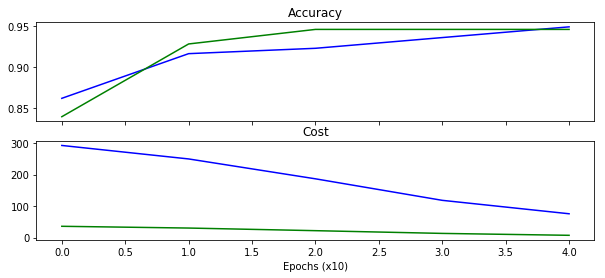

In [1889]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = input_X[batch * batch_size : (1 + batch) * batch_size]
            batch_y = input_Y[batch * batch_size : (1 + batch) * batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: input_X, y_: input_Y, pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: input_X_valid, y_: input_Y_valid, pkeep: 1})

            print ("Epoch:", epoch, "Acc =", "{:.5f}".format(train_accuracy), "Cost =", "{:.5f}".format(newCost), "Valid_Acc =", "{:.5f}".format(valid_accuracy), "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Record the results of the model
            accuracy_history.append(train_accuracy)
            cost_history.append(newCost)
            valid_accuracy_history.append(valid_accuracy)
            valid_cost_history.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_history) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print("Optimization Finished!")
    
    # Plot the accuracy and cost summaries 
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

    ax1.plot(accuracy_history, color='b') # blue
    ax1.plot(valid_accuracy_history, color='g') # green
    ax1.set_title('Accuracy')

    ax2.plot(cost_history, color='b')
    ax2.plot(valid_cost_history, color='g')
    ax2.set_title('Cost')

    plt.xlabel('Epochs (x10)')
    plt.show()

The prediction accuracy for the test data set using the AdamOptimizer model is 95%!

## Conclusion

After using the AdamOptimizer model with all of the features in our Neural Network, it gives a prediction accuracy of ~95% and a cross-validation score of ~95% for the test data set.
This models performs reasonably well and I suppose that if we have created new features, we could have built a more useful neural network.